In [2]:
#---Bubble Chart---
#Average Fare ($) Per City
#Total Number of Rides Per City
#Total Number of Drivers Per City
#City Type (Urban, Suburban, Rural)

#----Pie Chart-----
#% of Total Fares by City Type
#% of Total Rides by City Type
#% of Total Drivers by City Type

#Dependencies
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import matplotlib.colors
from pylab import *
from scipy import *

In [3]:
#Pulling in the data
city_path = "generated_data/city_data.csv"
ride_path = "generated_data/ride_data.csv"
#Reading data
city_df = pd.read_csv(city_path, encoding="utf-8")
ride_df = pd.read_csv(ride_path, encoding="utf-8")

In [4]:
city_df.head()

,city,driver_count,type
0,Tammyburgh,11,Urban
1,Melissaborough,15,Urban
2,Port Brianborough,62,Urban
3,New Katherine,68,Urban
4,Lake Charlesside,65,Urban


In [5]:
city_df['type'] = city_df['type'].str.replace('Urban','1')
city_df['type'] = city_df['type'].str.replace('Suburban','2')
city_df['type'] = city_df['type'].str.replace('Rural','3')

city_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [6]:
city_df['type'] = city_df['type'].astype(int)
city_df['type'].dtypes

dtype('int32')

In [7]:
#Merging
merge_df = pd.merge(ride_df, city_df, how='outer', on='city')
merge_df = merge_df.reset_index(drop=True)
merge_df.head()

,city,date,fare,ride_id,driver_count,type
0,Karenfurt,2017-01-01 19:03:03,32.90,3383346995405,19,1
1,Karenfurt,2017-01-01 05:30:46,22.47,18848561829,19,1
2,Karenfurt,2017-01-02 21:58:48,4.73,7929949609958,19,1
3,Karenfurt,2017-01-01 03:36:42,21.65,2940464578531,19,1
4,Karenfurt,2017-01-03 04:34:51,34.87,2170143080929,19,1


In [8]:
#Fair per city breakdown
fare_per_city = merge_df.groupby(['city'], as_index=False).mean()[['city','fare']]
fare_per_city.head()

,city,fare
0,Adamschester,29.594444
1,Alexisfort,27.366970
2,Amberberg,28.624375
3,Anthonyfurt,29.491176
4,Boyleberg,32.396000


In [9]:
#grouping by city and ride, converting to df, renaming column and deleting old column
ride_per_city = merge_df.groupby(['city'], as_index=False).count()[['city','ride_id']]
ride_per_city['ride count'] = ride_per_city['ride_id']
del ride_per_city['ride_id']
ride_per_city.head()

,city,ride count
0,Adamschester,9
1,Alexisfort,33
2,Amberberg,16
3,Anthonyfurt,17
4,Boyleberg,5


In [10]:
#grouping by city type
city_type = merge_df.groupby(['city'], as_index=False).mean()[['type','city']]
city_type.head()

,type,city
0,2,Adamschester
1,1,Alexisfort
2,2,Amberberg
3,2,Anthonyfurt
4,2,Boyleberg


In [11]:
#Grabbing drivers per city
drivers_per_city = city_df
drivers_per_city = drivers_per_city[['city',"driver_count"]]
drivers_per_city.head()

,city,driver_count
0,Tammyburgh,11
1,Melissaborough,15
2,Port Brianborough,62
3,New Katherine,68
4,Lake Charlesside,65


In [12]:
y = fare_per_city['fare']


In [13]:
c = ride_per_city['ride count']


In [14]:
x = drivers_per_city['driver_count']


In [15]:
z = city_type['type']


In [28]:
area = []
area.append(sqrt(c))

In [30]:
area

[array([3.        , 5.74456265, 4.        , 4.12310563, 2.23606798,
        4.69041576, 2.82842712, 5.38516481, 5.56776436, 4.47213595,
        1.41421356, 4.58257569, 4.        , 5.29150262, 4.        ,
        4.47213595, 5.91607978, 4.69041576, 4.47213595, 4.79583152,
        4.58257569, 5.        , 3.74165739, 4.35889894, 3.74165739,
        3.31662479, 3.31662479, 5.47722558, 4.35889894, 4.69041576,
        5.38516481, 4.47213595, 3.31662479, 4.12310563, 4.24264069,
        3.60555128, 3.        , 5.        , 4.89897949, 3.74165739,
        2.64575131, 3.31662479, 5.38516481, 4.12310563, 3.87298335,
        4.89897949, 3.46410162, 5.09901951, 4.79583152, 5.74456265,
        4.35889894, 4.12310563, 3.74165739, 5.29150262, 4.        ,
        5.47722558, 4.58257569, 5.47722558, 4.35889894, 3.87298335,
        4.12310563, 4.79583152, 4.79583152, 4.69041576, 3.31662479,
        4.35889894, 4.89897949, 5.19615242, 4.79583152, 3.60555128,
        2.23606798, 6.08276253, 4.69041576, 4.24

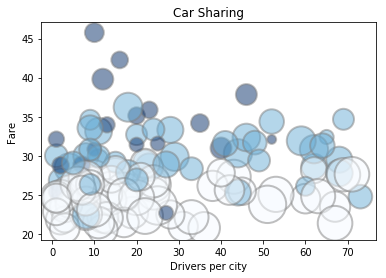

In [43]:
#Explanation

#Each bubble is a city.
# X axis is the average amount of drivers per city.
# Y is the Average Fares per city.
# C  is the bubble area: sum of rides in a city.
# Z is the color of the bubble - the darker the color the more rural the city.

plt.title("Car Sharing")
plt.xlabel('Drivers per city')
plt.ylabel('Fare')
plt.scatter(x, y, s=c*40, c=z, cmap="Blues", alpha=0.5, edgecolors="grey", linewidth=2,)
figsize=(20,10)
plt.show()

In [ ]:
#plt.scatter(x, y, s=area*40, c=z, cmap="Blues", alpha=0.5, edgecolors="grey", linewidth=2,)